In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#these two libraries are for formatting in plot
import matplotlib.ticker as tkr
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
#these four libraries are for making stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats
#change plots' style
plt.style.use('bmh')

#read csv file
#the orginal one downloaded from Kaggle
data1 = pd.read_csv('coursea_data.csv')

#manually type the category of each course
data2 = pd.read_csv('Final.csv')
#drop useless colunmn
data1=data1.drop(labels='Unnamed: 0',axis=1)
data2=data2.drop(labels=['Unnamed: 0','course_title','course_organization','course_Certificate_type','course_rating','course_difficulty','course_students_enrolled'],axis=1)
#merge two dataset
df_temp=pd.merge(data1,data2,left_index=True, right_index=True)
#correct the types
df_temp[['course_Certificate_type', 'course_difficulty']] = df_temp[['course_Certificate_type', 'course_difficulty']].astype('category')
df_temp['Category']=df_temp['Category'].astype('category')

KeyError: 'new_course'

# Change enrollment from string to number


In [2]:
#calculate enrollment numbers
df_temp['new_course'] = df_temp['course_students_enrolled'].str.replace('k', '')
df_temp['new_course'] = df_temp['new_course'].str.replace('m', '')
df_temp['new_course'] = df_temp['new_course'].astype('float')
df_temp['new2_course'] = np.where(df_temp['course_students_enrolled'].str.find('k') != -1,1000,1000000)

# Drop Helper Columns

In [3]:
#after calculation, drop temp tables
df_temp['num_enrollment']=df_temp['new_course'] * df_temp['new2_course']
df_temp['num_enrollment']=df_temp['num_enrollment'].astype('int')
df_temp.drop(labels = ['course_students_enrolled', 'new_course', 'new2_course'], axis = 1, inplace = True)

df_temp.head(50)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Category,num_enrollment
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,Information Technology,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,Business,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,Data Science,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,Social Sciences,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,Health,320000
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,Health,39000
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,Business,350000
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,Data Science,2400
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,Data Science,61000
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,Data Science,12000


In [4]:
# Trying to determine types of institution in course_org column
# École = school (in french), Universidad, college, Institute, Universiteit, School, Universitat, Università, HEC
# Sciences Po, Tecnológico de Monterrey, Universidade, INSEAD, Universität, Instituto, 
# exception: Institute for the Future  

# Assign type of organization (university or company) to each entry

In [5]:
#Classify organization type: uni or company
#Words that indentify uni
univ = ['École', 'Universidad', 'College', 'Institute', 'Universiteit', 'School', 'Universitat', 'Università', 'HEC',
       'Sciences Po', 'Tecnológico', 'INSEAD', 'Universität', 'Instituto', 'University']
conditions=[
    (df_temp['course_organization'].str.find('Institute for the Future')!=-1),
    (df_temp['course_organization'].str.find('École')!=-1),
    (df_temp['course_organization'].str.find('Universidad')!=-1),
    (df_temp['course_organization'].str.find('College')!=-1),
    (df_temp['course_organization'].str.find('Institute')!=-1),
    (df_temp['course_organization'].str.find('Universiteit')!=-1),
    (df_temp['course_organization'].str.find('Universitat')!=-1),
    (df_temp['course_organization'].str.find('Università')!=-1),
    (df_temp['course_organization'].str.find('HEC')!=-1),
    (df_temp['course_organization'].str.find('Sciences Po')!=-1),
    (df_temp['course_organization'].str.find('Tecnológico')!=-1),
    (df_temp['course_organization'].str.find('INSEAD')!=-1),
    (df_temp['course_organization'].str.find('Universität')!=-1),
    (df_temp['course_organization'].str.find('Instituto')!=-1),
    (df_temp['course_organization'].str.find('University')!=-1),
    (df_temp['course_organization'].str.find('School')!=-1)
    ]

values=['Company','University','University','University','University','University','University','University','University','University','University','University','University','University','University','University']

df_temp['type_org']=np.select(conditions,values)


conditions1 = [
    (df_temp['type_org'].str.find('Company')!=-1),
    (df_temp['type_org'].str.find('University')!=-1),
    (df_temp['type_org'].str.find('0')!=-1)
     ]

values1=['Company','University','Company']

df_temp['type_org1']=np.select(conditions1,values1)
   
df_temp['type_org']=df_temp['type_org1']

df_temp.drop(labels = ['type_org1'], axis = 1, inplace = True)



# Dealing with outliers

In [6]:
df_temp=df_temp.drop(df_temp.index[815])
df_temp

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,Category,num_enrollment,type_org
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,Information Technology,5300,Company
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,Business,17000,University
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,Data Science,130000,University
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,Social Sciences,91000,University
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,Health,320000,University
...,...,...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,Data Science,52000,Company
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,Language Learning,21000,University
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,Computer Science,30000,Company
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,Language Learning,9800,University


# Exploratory Analysis, grouping by org type

In [7]:
#split into two dataframe, uni and company
#First one is group by uni
df_uni=df_temp.query("type_org=='University'")
df_uni_grouped=df_uni.groupby("course_organization").agg({'num_enrollment':'mean','course_rating':'mean'})

#second one is group by company
df_co=df_temp.query("type_org=='Company'")
df_co_grouped=df_co.groupby("course_organization").agg({'num_enrollment':'mean','course_rating':'mean'})

#group by category
df_category=df_temp.groupby("Category").agg({'num_enrollment':'mean','course_rating':'mean'})
df_category=df_category.reset_index()

#group by categy by uni
df_ca_uni=df_uni.groupby('Category').agg({'num_enrollment':'mean', 'course_rating':'mean'})
df_ca_uni=df_ca_uni.reset_index()
#group by categy by co
df_ca_co=df_co.groupby('Category').agg({'num_enrollment':'mean', 'course_rating':'mean'})
df_ca_co=df_ca_co.reset_index()
df_ca_co=df_ca_co.dropna(how = 'any')
#print the pivot table
pd.set_option('display.max_rows', None)
df_pivot=df_temp.pivot_table(index=['Category','type_org','course_organization'],\
                             values=['course_rating','num_enrollment'],\
                             aggfunc={'course_rating':'mean','num_enrollment':'mean'})

# Grouping by category 

In [8]:
df_DS_co=df_pivot.query("Category=='Data Science'").query("type_org=='Company'")

df_AH_co=df_pivot.query("Category=='Arts and Humanities'").query("type_org=='Company'")

df_IT_co=df_pivot.query("Category=='Information Technology'").query("type_org=='Company'")

df_BS_co=df_pivot.query("Category=='Business'").query("type_org=='Company'")

df_CS_co=df_pivot.query("Category=='Computer Science'").query("type_org=='Company'")


df_PD_uni=df_pivot.query("Category=='Personal Development'").query("type_org=='University'")

df_DS_uni=df_pivot.query("Category=='Data Science'").query("type_org=='University'")

df_CS_uni=df_pivot.query("Category=='Computer Science'").query("type_org=='University'")

df_LL_uni=df_pivot.query("Category=='Language Learning'").query("type_org=='University'")

df_ML_uni=df_pivot.query("Category=='Math and Logic'").query("type_org=='University'")

# Filtering for top 10 by enrollment in each category

In [9]:
df_DS_co['Enroll_Rank']=df_DS_co['num_enrollment'].rank(ascending=False).astype('int')
df_DS_co=df_DS_co.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_DS_co=df_DS_co.reset_index()

df_AH_co['Enroll_Rank']=df_AH_co['num_enrollment'].rank(ascending=False).astype('int')
df_AH_co=df_AH_co.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_AH_co=df_AH_co.reset_index()

df_IT_co['Enroll_Rank']=df_IT_co['num_enrollment'].rank(ascending=False).astype('int')
df_IT_co=df_IT_co.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_IT_co=df_IT_co.reset_index()

df_BS_co['Enroll_Rank']=df_BS_co['num_enrollment'].rank(ascending=False).astype('int')
df_BS_co=df_BS_co.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_BS_co=df_BS_co.reset_index()

df_CS_co['Enroll_Rank']=df_CS_co['num_enrollment'].rank(ascending=False).astype('int')
df_CS_co=df_CS_co.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_CS_co=df_CS_co.reset_index()

df_PD_uni['Enroll_Rank']=df_PD_uni['num_enrollment'].rank(ascending=False).astype('int')
df_PD_uni=df_PD_uni.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_PD_uni=df_PD_uni.reset_index()

df_DS_uni['Enroll_Rank']=df_DS_uni['num_enrollment'].rank(ascending=False).astype('int')
df_DS_uni=df_DS_uni.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_DS_uni=df_DS_uni.reset_index()

df_CS_uni['Enroll_Rank']=df_CS_uni['num_enrollment'].rank(ascending=False).astype('int')
df_CS_uni=df_CS_uni.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_CS_uni=df_CS_uni.reset_index()

df_LL_uni['Enroll_Rank']=df_LL_uni['num_enrollment'].rank(ascending=False).astype('int')
df_LL_uni=df_LL_uni.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_LL_uni=df_LL_uni.reset_index()

df_ML_uni['Enroll_Rank']=df_ML_uni['num_enrollment'].rank(ascending=False).astype('int')
df_ML_uni=df_ML_uni.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_ML_uni=df_ML_uni.reset_index()

In [10]:
#rank company top 10 by enrollment
df_co_grouped['Enroll_Rank']=df_co_grouped['num_enrollment'].rank(ascending=False).astype('int')
df_co10=df_co_grouped.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_co10=df_co10.reset_index()
#rank uni top 10 by enrollment
df_uni_grouped['Enroll_Rank']=df_uni_grouped['num_enrollment'].rank(ascending=False).astype('int')
df_uni10=df_uni_grouped.query("Enroll_Rank<=10").sort_values("Enroll_Rank",ascending=True)
df_uni10=df_uni10.reset_index()
#rank category by enrollment
df_category['Enroll_Rank']=df_category['num_enrollment'].rank(ascending=False).astype('int')
df_category_enroll=df_category.sort_values("Enroll_Rank",ascending=True)
#rank category by enrollment by uni
df_ca_uni['Enroll_Rank']=df_ca_uni['num_enrollment'].rank(ascending=False).astype('int')
df_ca_uni_enroll=df_ca_uni.sort_values('Enroll_Rank', ascending=True)
#rank category by enrollment by co 
df_ca_co['Enroll_Rank']=df_ca_co['num_enrollment'].rank(ascending=False).astype('int')
df_ca_co_enroll=df_ca_co.sort_values('Enroll_Rank', ascending=True)

#rank company top 10 by course rating
df_co_grouped['Rating_Rank']=df_co_grouped['course_rating'].rank(ascending=False).astype('int')
df_co10_rating=df_co_grouped.query("Rating_Rank<=10").sort_values("Rating_Rank",ascending=True)
df_co10_rating=df_co10_rating.reset_index()
#rank company top 10 by course rating
df_uni_grouped['Rating_Rank']=df_uni_grouped['course_rating'].rank(ascending=False).astype('int')
df_uni10_rating=df_uni_grouped.query("Rating_Rank<=10").sort_values("Rating_Rank",ascending=True)
df_uni10_rating=df_uni10_rating.reset_index()
#rank category by course rating
df_category['Rating_Rank']=df_category['course_rating'].rank(ascending=False).astype('int')
df_category_rating=df_category.sort_values("Rating_Rank",ascending=True)


# Simple OLS

In [11]:
#Statistics
result = scipy.stats.linregress(df_temp['course_rating'], df_temp['num_enrollment'])

print("P-Value:",f"{result.pvalue:.3f}","\nSlope:",f"{result.slope:.3f}","\nIntercept:",f"{result.intercept:.3f}"\
      ,"\nR-value:",f"{result.rvalue:.3f}","\nStd:",f"{result.stderr:.3f}")

P-Value: 0.092 
Slope: 56916.889 
Intercept: -178359.937 
R-value: 0.057 
Std: 33700.857


# Descriptive stats

In [12]:
df_temp['course_rating'].describe().apply(lambda x: format(x, ',.2f'))

count    890.00
mean       4.68
std        0.16
min        3.30
25%        4.60
50%        4.70
75%        4.80
max        5.00
Name: course_rating, dtype: object

In [13]:
df_temp['num_enrollment'].describe().apply(lambda x: format(x, ',.2f'))

count          890.00
mean        87,844.83
std        163,096.50
min          1,500.00
25%         17,250.00
50%         42,000.00
75%         99,000.00
max      3,200,000.00
Name: num_enrollment, dtype: object

# Some plots were used for exploratory analysis but were not used in presentation, they've been commented out

In [14]:
'''plt.hist(df_temp.course_rating)
plt.xlabel('Course Rating')
plt.ylabel('Count')
plt.title('Distribution of Course Rating')
plt.show()'''

"plt.hist(df_temp.course_rating)\nplt.xlabel('Course Rating')\nplt.ylabel('Count')\nplt.title('Distribution of Course Rating')\nplt.show()"

In [15]:
'''df_temp['num_enrollment'].describe().apply(lambda x: format(x, 'f'))

#Overall Enrollment Distribution
plt.hist(df_temp.num_enrollment)
plt.xlabel('Course Enrollment')
plt.ylabel('Count')
plt.title('Distribution of Course Enrollment')
plt.show()

#Enrollment distribution for Uni
plt.hist(df_uni.num_enrollment)
plt.xlabel('Course Enrollment')
plt.ylabel('Count')
plt.title('Distribution of Course Enrollment for Universities')
plt.show()

#Enrollment Distribution for Company
a=plt.hist(df_co.num_enrollment)
plt.xlabel('Course Enrollment')
plt.ylabel('Count')
plt.title('Distribution of Course Enrollment for Companies')
plt.show()'''

"df_temp['num_enrollment'].describe().apply(lambda x: format(x, 'f'))\n\n#Overall Enrollment Distribution\nplt.hist(df_temp.num_enrollment)\nplt.xlabel('Course Enrollment')\nplt.ylabel('Count')\nplt.title('Distribution of Course Enrollment')\nplt.show()\n\n#Enrollment distribution for Uni\nplt.hist(df_uni.num_enrollment)\nplt.xlabel('Course Enrollment')\nplt.ylabel('Count')\nplt.title('Distribution of Course Enrollment for Universities')\nplt.show()\n\n#Enrollment Distribution for Company\na=plt.hist(df_co.num_enrollment)\nplt.xlabel('Course Enrollment')\nplt.ylabel('Count')\nplt.title('Distribution of Course Enrollment for Companies')\nplt.show()"

# Scatter enrollment and rating with best fit line

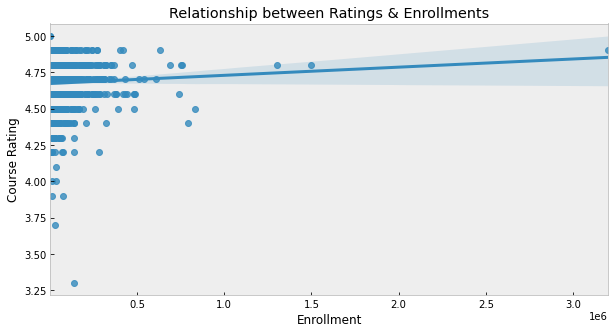

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10,5))
sns.regplot(x="num_enrollment", y="course_rating", data=df_temp)
plt.xlabel('Enrollment')
plt.ylabel('Course Rating')
plt.title('Relationship between Ratings & Enrollments')
plt.grid()
plt.show()
plt.savefig('Q1 Relationship between ratings & enrollment.jpg')
### for first question

# Various Visualizations

<Figure size 576x288 with 0 Axes>

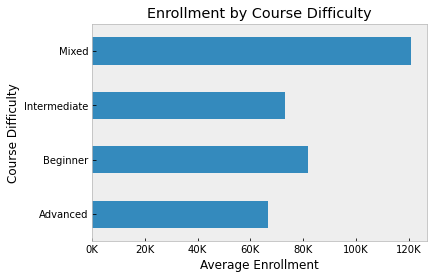

In [17]:
#People prefer to get enrolled in "Specializations" or "Courses". 1e7 = 10 000 000
aggreg_data2=df_temp.groupby('course_difficulty')['num_enrollment'].mean()
aggreg_data2=pd.DataFrame(aggreg_data2)
aggreg_data2=aggreg_data2.reset_index()

plt.figure(figsize=(8,4))
aggreg_data2.plot(kind='barh', x='course_difficulty',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.xlabel('Average Enrollment')
plt.ylabel('Course Difficulty')
plt.title('Enrollment by Course Difficulty')
plt.grid()
plt.savefig('Q2 Enrollments vs Course Difficulty.jpg')

##for question2

<Figure size 576x288 with 0 Axes>

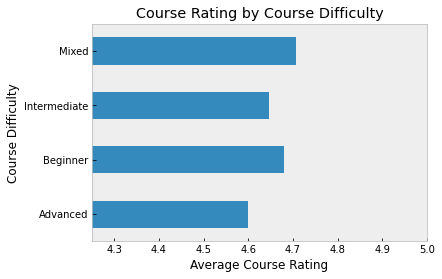

In [18]:
aggreg_data3=df_temp.groupby('course_difficulty')['course_rating'].mean()
aggreg_data3=pd.DataFrame(aggreg_data3)
aggreg_data3=aggreg_data3.reset_index()

plt.figure(figsize=(8,4))
aggreg_data3.plot(kind='barh', x='course_difficulty',y='course_rating',legend=None)
plt.xlim([4.25, 5.00])
plt.xlabel('Average Course Rating')
plt.ylabel('Course Difficulty')
plt.title('Course Rating by Course Difficulty')

plt.grid()
plt.savefig('Q2 Course rating vs Course Difficulty.jpg')



<Figure size 576x288 with 0 Axes>

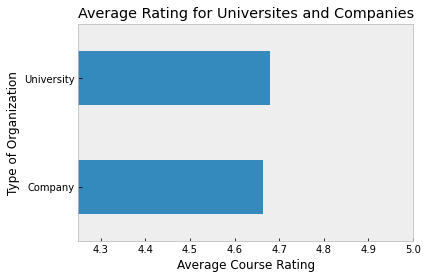

<Figure size 576x288 with 0 Axes>

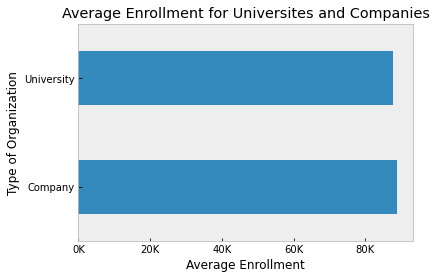

In [19]:
aggreg_data4=df_temp.groupby('type_org')[['course_rating','num_enrollment']].mean()
aggreg_data4=pd.DataFrame(aggreg_data4)
aggreg_data4=aggreg_data4.reset_index()

plt.figure(figsize=(8,4))
aggreg_data4.plot(kind='barh', x='type_org',y='course_rating',legend=None)
plt.xlim([4.25, 5.00])
plt.xlabel('Average Course Rating')
plt.ylabel('Type of Organization')
plt.title('Average Rating for Universites and Companies')
plt.grid()

#plt.savefig('Q2 Course rating vs Course Difficulty.jpg')

plt.figure(figsize=(8,4))
aggreg_data4.plot(kind='barh', x='type_org',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#plt.xlim([4.25, 5.00])
plt.xlabel('Average Enrollment')
plt.ylabel('Type of Organization')
plt.title('Average Enrollment for Universites and Companies')
plt.grid()

#plt.savefig('Q2 Course rating vs Course Difficulty.jpg'

Category                        
Business                            278
Health                              114
Computer Science                     77
Data Science                         77
Social Sciences                      55
Arts and Humanities                  42
Language Learning                    41
Physical Science and Engineering     31
Personal Development                 16
Information Technology               10
Math and Logic                        5
dtype: int64

<Figure size 2160x720 with 0 Axes>

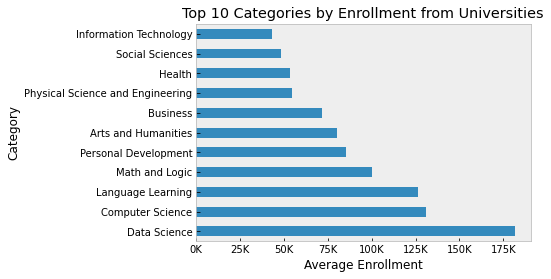

In [20]:
#plot category by enrollments by uni - jay, 07.04
plt.figure(figsize=(30,10))
df_ca_uni_enroll.plot(kind='barh', x='Category',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.grid()
plt.ylabel("Category")
plt.xlabel("Average Enrollment")
plt.title("Top 10 Categories by Enrollment from Universities")

plt.savefig('Q5 Rank enrollmets in categories by univeristy.jpg')
## use this for question 5 

df_uni.value_counts(['Category'])

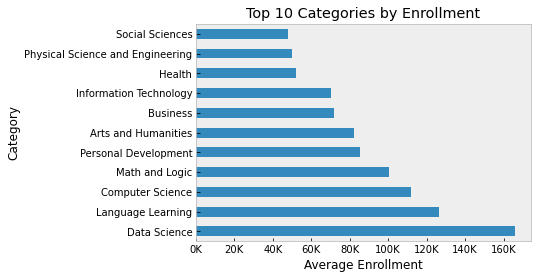

<Figure size 432x288 with 0 Axes>

In [21]:
#plot category by enrollments
df_category_enroll.plot(kind='barh', x='Category',y='num_enrollment',legend=None).get_xaxis()\
.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.grid()
plt.ylabel("Category")
plt.xlabel("Average Enrollment")
plt.title("Top 10 Categories by Enrollment")
plt.show()
plt.savefig('Q5 Rank enrollmets in categories.jpg')
## use this for question 5 

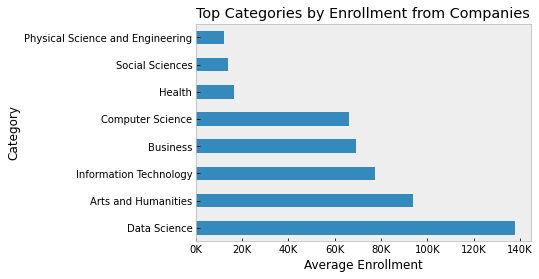

In [22]:
#plot category by enrollments by co - jay, 07.04

df_ca_co_enroll.plot(kind='barh', x='Category',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.grid()

'''
for index, value in enumerate(df_ca_co_enroll['num_enrollment']):
    plt.text(value, index, format(value, ',.0f'))
'''

plt.ylabel("Category")
plt.xlabel("Average Enrollment")
plt.title("Top Categories by Enrollment from Companies")
plt.savefig('Q5 Rank enrollmets in categories by company.jpg')
## use this for question 5 

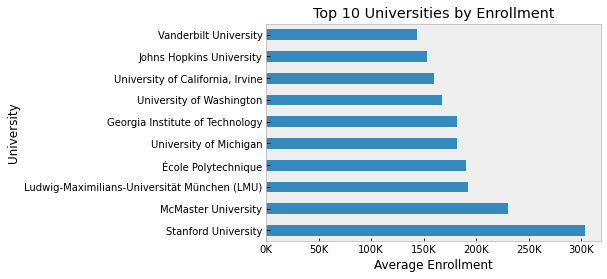

<Figure size 432x288 with 0 Axes>

In [23]:
#plot the top 10 enrollments by uni
df_uni10.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.grid()
plt.ylabel("University")
plt.xlabel("Average Enrollment")
plt.title("Top 10 Universities by Enrollment")
plt.show()
plt.savefig('Q6 Top 10 enrollmets in universities.jpg')
#for question 6

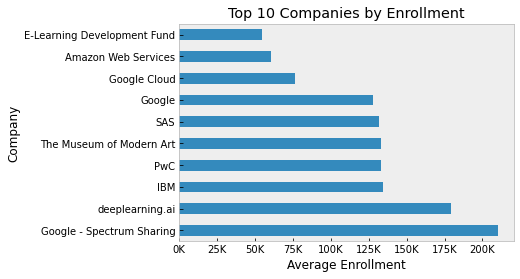

<Figure size 432x288 with 0 Axes>

In [24]:
#plot the top 10 enrollments by company
a=df_co10.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None)
a.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.grid()
plt.ylabel("Company")
plt.xlabel("Average Enrollment")
plt.title("Top 10 Companies by Enrollment")
plt.show()
plt.savefig('Q6 Top 10 enrollmets in companies.png')
#for question 6

# Some plots were not useful and are commented out

In [25]:
'''#plot category by ratings
df_category_rating.plot(kind='barh', x='Category',y='course_rating')
plt.xlim([4.355, 5.0])
plt.show()
#plt.savefig('.png')'''

"#plot category by ratings\ndf_category_rating.plot(kind='barh', x='Category',y='course_rating')\nplt.xlim([4.355, 5.0])\nplt.show()\n#plt.savefig('.png')"

In [26]:
'''#plot the top 10 course rating by uni
df_uni10_rating.plot(kind='barh', x='course_organization',y='course_rating')
plt.xlim([4.677,5.0])
plt.show()
#plt.savefig('.png')'''

"#plot the top 10 course rating by uni\ndf_uni10_rating.plot(kind='barh', x='course_organization',y='course_rating')\nplt.xlim([4.677,5.0])\nplt.show()\n#plt.savefig('.png')"

In [27]:
'''#plot the top 10 course rating by company
df_co10_rating.plot(kind='barh', x='course_organization',y='course_rating')
plt.xlim([4.677, 5.0])
plt.show()
#plt.savefig('.png')'''

"#plot the top 10 course rating by company\ndf_co10_rating.plot(kind='barh', x='course_organization',y='course_rating')\nplt.xlim([4.677, 5.0])\nplt.show()\n#plt.savefig('.png')"

In [28]:
'''#plot the distribution of course rating
df_temp['course_rating'].plot.kde()
plt.xlim([3.0, 5.5])
plt.show()
#plt.savefig('.png')
plt.hist(df_temp.course_rating)
plt.xlabel('Course Rating')
plt.ylabel('Count')
plt.title('Distribution of Course Rating')
plt.show()'''

"#plot the distribution of course rating\ndf_temp['course_rating'].plot.kde()\nplt.xlim([3.0, 5.5])\nplt.show()\n#plt.savefig('.png')\nplt.hist(df_temp.course_rating)\nplt.xlabel('Course Rating')\nplt.ylabel('Count')\nplt.title('Distribution of Course Rating')\nplt.show()"

In [29]:
'''g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", s=75,data=df_co10)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#thousand separator
g.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.show()
#plt.savefig('.png')'''

'g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", s=75,data=df_co10)\ng.legend(loc=\'center left\', bbox_to_anchor=(1.25, 0.5), ncol=1)\n#thousand separator\ng.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000) + \'K\'))\nplt.show()\n#plt.savefig(\'.png\')'

In [30]:
'''g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", s=75,data=df_co10)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#thousand separator
g.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.show()
#plt.savefig('.png')'''

'g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", s=75,data=df_co10)\ng.legend(loc=\'center left\', bbox_to_anchor=(1.25, 0.5), ncol=1)\n#thousand separator\ng.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000) + \'K\'))\nplt.show()\n#plt.savefig(\'.png\')'

In [31]:
'''g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", data=df_uni10)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.show()
#plt.savefig('.png')'''

'g=sns.scatterplot(x="num_enrollment", y="course_rating", hue="course_organization", data=df_uni10)\ng.legend(loc=\'center left\', bbox_to_anchor=(1.25, 0.5), ncol=1)\ng.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: \'{:,.0f}\'.format(x/1000) + \'K\'))\nplt.show()\n#plt.savefig(\'.png\')'

In [32]:
'''ax = sns.lmplot(x="num_enrollment", y="course_rating", data=df_uni)

plt.show()
#plt.savefig('.png')'''

'ax = sns.lmplot(x="num_enrollment", y="course_rating", data=df_uni)\n\nplt.show()\n#plt.savefig(\'.png\')'

In [33]:
'''ax = sns.regplot(x="num_enrollment", y="course_rating", data=df_co)

plt.show()'''
#plt.savefig('.png')

'ax = sns.regplot(x="num_enrollment", y="course_rating", data=df_co)\n\nplt.show()'

<Figure size 576x288 with 0 Axes>

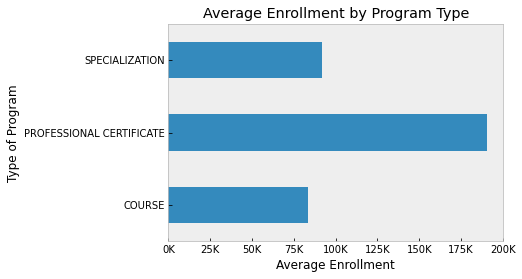

<Figure size 576x288 with 0 Axes>

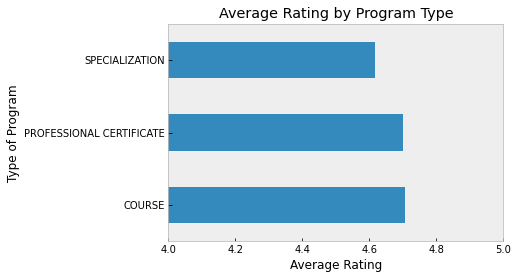

In [34]:
aggreg_data=df_temp.groupby('course_Certificate_type')['num_enrollment'].mean()
aggreg_data=pd.DataFrame(aggreg_data)
aggreg_data=aggreg_data.reset_index()

plt.figure(figsize=(8,4))
aggreg_data.plot(kind='barh', x='course_Certificate_type',y='num_enrollment',legend=None)\
.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.xlabel('Average Enrollment')
plt.ylabel('Type of Program')
plt.title('Average Enrollment by Program Type')
plt.grid()

aggreg_data=df_temp.groupby('course_Certificate_type')['course_rating'].mean()
aggreg_data=pd.DataFrame(aggreg_data)
aggreg_data=aggreg_data.reset_index()

plt.figure(figsize=(8,4))
aggreg_data.plot(kind='barh', x='course_Certificate_type',y='course_rating',legend=None)
plt.xlabel('Average Rating')
plt.xlim([4.00,5.00])
plt.ylabel('Type of Program')
plt.title('Average Rating by Program Type')
plt.grid()



In [35]:
'''plt.figure(figsize=(30,10))
sns.boxplot( x="Category", y='course_rating' ,data=df_temp)
#plt.boxplot(df_category)'''

'plt.figure(figsize=(30,10))\nsns.boxplot( x="Category", y=\'course_rating\' ,data=df_temp)\n#plt.boxplot(df_category)'

In [36]:
#ultimately we found the bubble charts too difficult to interpret so we did not include them in the slides
#the code runs though


'''plt.figure(figsize=(30,10))
bubble = df_temp.groupby('Category').agg({'course_rating': 'mean','num_enrollment':'mean','Category':'count'})
bubble.columns=['avg_rating','total_enroll','count_category']


colors = ['skyblue','lightblue','steelblue','dodgerblue','cornflowerblue','royalblue','powderblue','navy','deepskyblue','slateblue','blue']

fig, ax = plt.subplots()
scatter=plt.scatter (bubble.total_enroll, bubble.avg_rating,s = bubble.count_category*3,c=colors)
plt.title("Relationship between Number of Courses, Ratings, and Total Enrollment")
plt.xlabel("Average Enrollment")
plt.ylabel("Average Rating")
#plt.xlim(0,25000000)
#plt.ylim(4.6,4.75)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="center left", title="Number of Courses",bbox_to_anchor=(1,0.65), ncol=1)


X=bubble.total_enroll
Y=bubble.avg_rating
annotations=['A&H','Bus','CS','DS','Health','IT','Languages','Math','Pers Dev','Phys Sci','Soc Sci']

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i]+.005, Y[i]+.0025))
plt.grid()
plt.show()
plt.savefig('Bubble.png')
'''

'plt.figure(figsize=(30,10))\nbubble = df_temp.groupby(\'Category\').agg({\'course_rating\': \'mean\',\'num_enrollment\':\'mean\',\'Category\':\'count\'})\nbubble.columns=[\'avg_rating\',\'total_enroll\',\'count_category\']\n\n\ncolors = [\'skyblue\',\'lightblue\',\'steelblue\',\'dodgerblue\',\'cornflowerblue\',\'royalblue\',\'powderblue\',\'navy\',\'deepskyblue\',\'slateblue\',\'blue\']\n\nfig, ax = plt.subplots()\nscatter=plt.scatter (bubble.total_enroll, bubble.avg_rating,s = bubble.count_category*3,c=colors)\nplt.title("Relationship between Number of Courses, Ratings, and Total Enrollment")\nplt.xlabel("Average Enrollment")\nplt.ylabel("Average Rating")\n#plt.xlim(0,25000000)\n#plt.ylim(4.6,4.75)\n\n# produce a legend with a cross section of sizes from the scatter\nhandles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)\nlegend2 = ax.legend(handles, labels, loc="center left", title="Number of Courses",bbox_to_anchor=(1,0.65), ncol=1)\n\n\nX=bubble.total_enroll\nY=bubble.

In [37]:


'''plt.figure(figsize=(30,10))
bubble = df_temp.groupby('Category').agg({'course_rating': 'mean','num_enrollment':'mean','Category':'count'})
bubble.columns=['avg_rating','avg_enroll','count_category']


colors = ['skyblue','lightblue','steelblue','dodgerblue','cornflowerblue','royalblue','powderblue','navy','deepskyblue','slateblue','blue']

fig, ax = plt.subplots()
scatter=plt.scatter (bubble.avg_enroll, bubble.count_category,s = (bubble.avg_rating)**5,c=colors)
plt.title("Relationship between Number of Courses, Ratings, and Total Enrollment")
plt.xlabel("Average Enrollment")
plt.ylabel("Number of Courses")
#plt.xlim(0,25000000)
#plt.ylim(4.6,4.75)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="center left", title="Number of Courses",bbox_to_anchor=(1,0.65), ncol=1)


X=bubble.avg_enroll
Y=bubble.avg_rating
annotations=['A&H','Bus','CS','DS','Health','IT','Languages','Math','Pers Dev','Phys Sci','Soc Sci']

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
plt.grid()
plt.show()
plt.savefig('Bubble.png')
'''

'plt.figure(figsize=(30,10))\nbubble = df_temp.groupby(\'Category\').agg({\'course_rating\': \'mean\',\'num_enrollment\':\'mean\',\'Category\':\'count\'})\nbubble.columns=[\'avg_rating\',\'avg_enroll\',\'count_category\']\n\n\ncolors = [\'skyblue\',\'lightblue\',\'steelblue\',\'dodgerblue\',\'cornflowerblue\',\'royalblue\',\'powderblue\',\'navy\',\'deepskyblue\',\'slateblue\',\'blue\']\n\nfig, ax = plt.subplots()\nscatter=plt.scatter (bubble.avg_enroll, bubble.count_category,s = (bubble.avg_rating)**5,c=colors)\nplt.title("Relationship between Number of Courses, Ratings, and Total Enrollment")\nplt.xlabel("Average Enrollment")\nplt.ylabel("Number of Courses")\n#plt.xlim(0,25000000)\n#plt.ylim(4.6,4.75)\n\n# produce a legend with a cross section of sizes from the scatter\nhandles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)\nlegend2 = ax.legend(handles, labels, loc="center left", title="Number of Courses",bbox_to_anchor=(1,0.65), ncol=1)\n\n\nX=bubble.avg_enroll\nY=bubble.

(-1.1408459301706835,
 1.1221679352380993,
 -1.125578640651106,
 1.218510671371998)

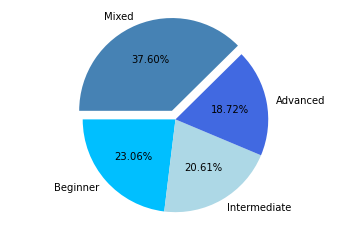

In [38]:
courses_difficulty=['Beginner','Intermediate','Advanced','Mixed']

number_average_enrollment=[81974.948665,73264.141414,66547.368421,133633.155080]
'''
plt.pie(number_average_enrollment, labels=courses_difficulty)
plt.axis('equal')
plt.title('Average Enrollment Numbers by Course Difficulty - Percentage')
'''
colors=['deepskyblue','lightblue','royalblue','steelblue']
explode=(0,0,0,0.1)
plt.pie(number_average_enrollment, explode=explode, labels=courses_difficulty, colors=colors, shadow=False, autopct='%.2f%%', startangle=180)
plt.axis('equal')
#plt.savefig('Pie.png')

<Figure size 1440x1440 with 0 Axes>

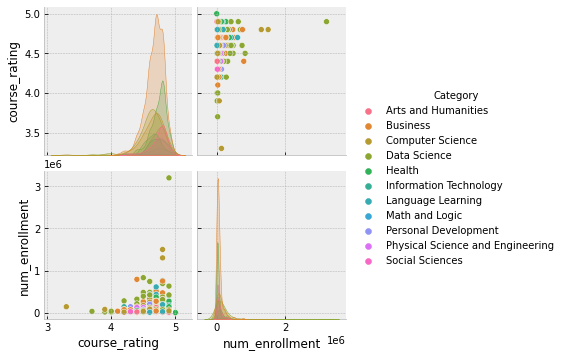

In [39]:
plt.figure(figsize=(20,20))
sns.pairplot(df_temp,diag_kind = 'kde',hue = 'Category')

In [40]:
'''plt.figure(figsize=(30,10))
sns.boxplot( x="Category", y='num_enrollment' ,data=df_temp)
plt.ylim([0, 570000])
#plt.boxplot(df_category)'''

'plt.figure(figsize=(30,10))\nsns.boxplot( x="Category", y=\'num_enrollment\' ,data=df_temp)\nplt.ylim([0, 570000])\n#plt.boxplot(df_category)'

In [41]:
'''
#The level of enrollment is particularly high in the "Beginner" programs. 1e7 = 10 000 000
aggreg_data3=df_temp.groupby('course_Certificate_type')['course_rating'].mean()
aggreg_data3=pd.DataFrame(aggreg_data3)
plt.figure(figsize=(6,3))
plt.xlim([4.35, 5.00])
plt.barh(aggreg_data3.index,aggreg_data3.course_rating)
plt.xlabel('Average program rating')
plt.ylabel('Course Difficulty of the Program')
plt.title('Average program rating vs Course Difficulty of the Program')
#plt.savefig('.png')'''
#Overall, "Specializations" have a lower average program rating than "Professional Certificates" and "Courses". Courses have the highest average program rating

'\n#The level of enrollment is particularly high in the "Beginner" programs. 1e7 = 10 000 000\naggreg_data3=df_temp.groupby(\'course_Certificate_type\')[\'course_rating\'].mean()\naggreg_data3=pd.DataFrame(aggreg_data3)\nplt.figure(figsize=(6,3))\nplt.xlim([4.35, 5.00])\nplt.barh(aggreg_data3.index,aggreg_data3.course_rating)\nplt.xlabel(\'Average program rating\')\nplt.ylabel(\'Course Difficulty of the Program\')\nplt.title(\'Average program rating vs Course Difficulty of the Program\')\n#plt.savefig(\'.png\')'

# REGRESSION ANALYSIS--DOES RATING IMPACT ENROLLMENT CONTROLLING FOR OTHER VARIABLES
can't claim causality 

In [42]:
#REGRESSION ANALYSIS--DOES RATING IMPACT ENROLLMENT CONTROLLING FOR OTHER VARIABLES

import statsmodels.api as sm
import statsmodels.formula.api as smf

df_reg=df_temp
df_reg[['course_organization', 'type_org']]= df_reg[['course_organization', 'type_org']].astype('category')

print(df_reg.dtypes)
y,X=patsy.dmatrices('num_enrollment ~ course_rating + course_Certificate_type + course_difficulty + Category + type_org + course_organization',df_reg)

coef,resid, _,_ =np.linalg.lstsq(X,y,rcond=None)
coef=pd.Series( index=X.design_info.column_names,dtype=float)

model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

#interpretation: a one unit increase in rating is associated with a 104,200 increase in enrollment, holding all else constant

course_title                 object
course_organization        category
course_Certificate_type    category
course_rating               float64
course_difficulty          category
Category                   category
num_enrollment                int32
type_org                   category
dtype: object
                            OLS Regression Results                            
Dep. Variable:         num_enrollment   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.190
Date:                Thu, 08 Jul 2021   Prob (F-statistic):             0.0680
Time:                        13:16:11   Log-Likelihood:                -11835.
No. Observations:                 890   AIC:                         2.401e+04
Df Residuals:                     720   BIC:                         2.482e+04
Df Model:                         169                             

# Top providers (uni and company) for selected categories

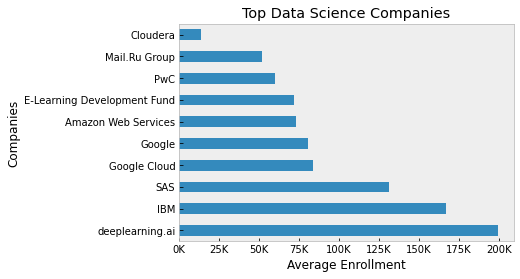

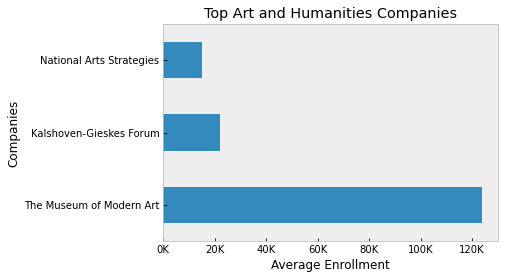

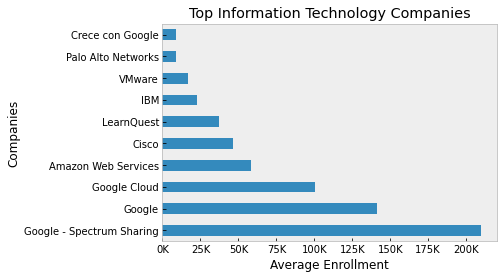

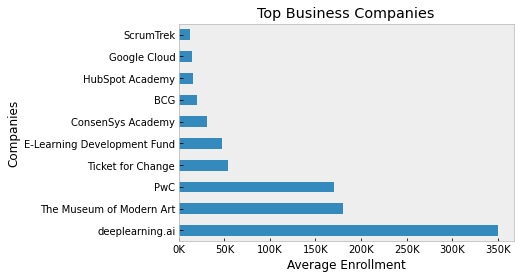

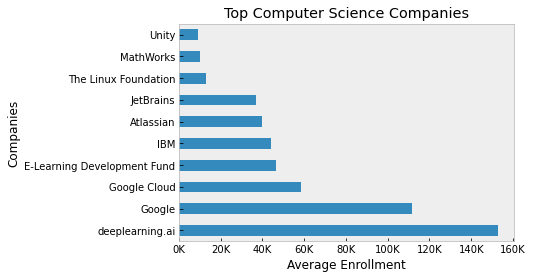

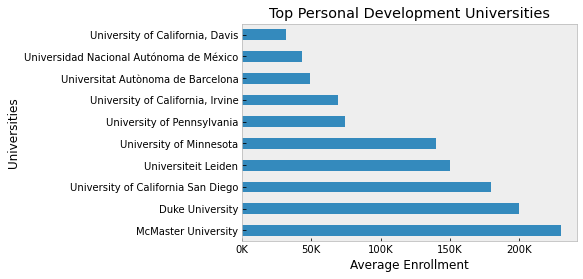

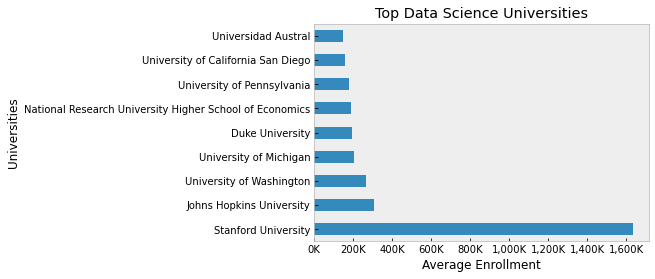

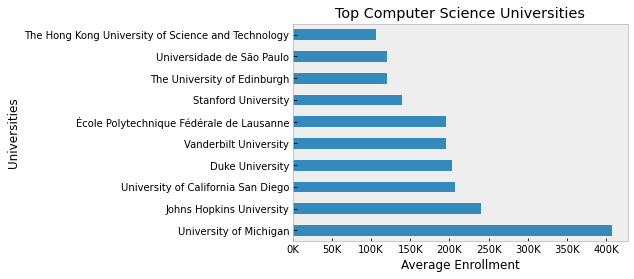

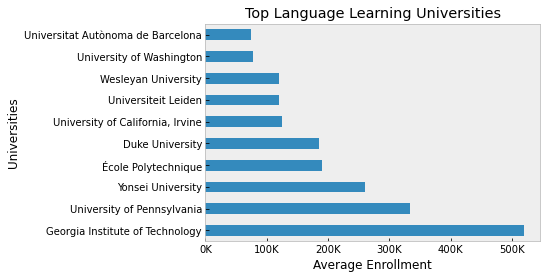

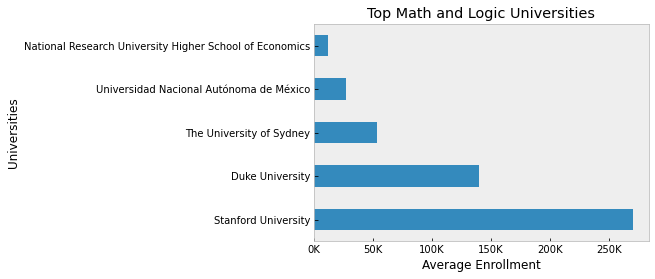

In [43]:
df_DS_co.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Data Science Companies")
plt.xlabel('Average Enrollment')
plt.ylabel('Companies')
plt.grid()
#plt.savefig('.png')

df_AH_co.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Art and Humanities Companies")
plt.xlabel('Average Enrollment')
plt.ylabel('Companies')
plt.grid()
#plt.savefig('.png')

df_IT_co.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Information Technology Companies")
plt.xlabel('Average Enrollment')
plt.ylabel('Companies')
plt.grid()
#plt.savefig('.png')

df_BS_co.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Business Companies")
plt.xlabel('Average Enrollment')
plt.ylabel('Companies')
plt.grid()
#plt.savefig('.png')

df_CS_co.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Computer Science Companies")
plt.xlabel('Average Enrollment')
plt.ylabel('Companies')
plt.grid()
#plt.savefig('.png')

df_PD_uni.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Personal Development Universities")
plt.xlabel('Average Enrollment')
plt.ylabel('Universities')
plt.grid()
#plt.savefig('.png')

df_DS_uni.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Data Science Universities")
plt.xlabel('Average Enrollment')
plt.ylabel('Universities')
plt.grid()
#plt.savefig('.png')

df_CS_uni.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Computer Science Universities")
plt.xlabel('Average Enrollment')
plt.ylabel('Universities')
plt.grid()
#plt.savefig('.png')

df_LL_uni.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Language Learning Universities")
plt.xlabel('Average Enrollment')
plt.ylabel('Universities')
plt.grid()
#plt.savefig('.png')

df_ML_uni.plot(kind='barh', x='course_organization',y='num_enrollment',legend=None).get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title("Top Math and Logic Universities")
plt.xlabel('Average Enrollment')
plt.ylabel('Universities')
plt.grid()
#plt.savefig('.png')

#for our last question

# Logit Regression, ratings impact on likelihood a course has more than 300,000 enrolled (top 5%)

In [44]:
df_log=df_temp
df_log['winner']=np.where(df_log['num_enrollment']>=300000,1,0)#300,000 is top 5% of courses
df_log.winner.sum()

df_log[['course_organization', 'type_org']]= df_log[['course_organization', 'type_org']].astype('category')

print(df_log.dtypes)
y,X=patsy.dmatrices('winner ~ course_rating + course_Certificate_type + course_difficulty + Category + type_org ',df_log)

coef,resid, _,_ =np.linalg.lstsq(X,y,rcond=None)
coef=pd.Series( index=X.design_info.column_names,dtype=float)

model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

course_title                 object
course_organization        category
course_Certificate_type    category
course_rating               float64
course_difficulty          category
Category                   category
num_enrollment                int32
type_org                   category
winner                        int32
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 winner   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.312
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           6.79e-06
Time:                        13:16:13   Log-Likelihood:                 97.908
No. Observations:                 890   AIC:                            -159.8
Df Residuals:                     872   BIC:                            -73.57
Df Model:                     

In [45]:
#interpretation of logit regression
#DID NOT control for course organization because it made adjusted R square  negative!!!
#a one unit increase in rating increases the likelihood of having enrollment>300,000 by about (e^0.0937)-1=9.8%, holding other variables constant

In [46]:
# df_temp.to_csv("HAHAHA.csv")

In [47]:
# Tried to scrap web data

In [48]:
'''
from bs4 import BeautifulSoup                   
import requests
#get info from website
url='https://www.coursera.org/courses'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

#find course title
y = soup.find_all('h2')
#<h2 class="cds-111 card-title css-1fkiswk cds-113">Google Data Analytics</h2>
print(y)'''

'\nfrom bs4 import BeautifulSoup                   \nimport requests\n#get info from website\nurl=\'https://www.coursera.org/courses\'\npage = requests.get(url)\nsoup = BeautifulSoup(page.text, \'lxml\')\n\n#find course title\ny = soup.find_all(\'h2\')\n#<h2 class="cds-111 card-title css-1fkiswk cds-113">Google Data Analytics</h2>\nprint(y)'

In [49]:
'''from selenium import webdriver
diverPath='D:\chromedriver_win32\chromedriver.exe'
browser=webdriver.Chrome(diverPath)

url='https://www.coursera.org/courses'
browser.get(url)
x = browser.find_elements_by_tag_name('h2')
for data in range(len(x)):
    print(x[data].text)'''

"from selenium import webdriver\ndiverPath='D:\\chromedriver_win32\\chromedriver.exe'\nbrowser=webdriver.Chrome(diverPath)\n\nurl='https://www.coursera.org/courses'\nbrowser.get(url)\nx = browser.find_elements_by_tag_name('h2')\nfor data in range(len(x)):\n    print(x[data].text)"